In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats


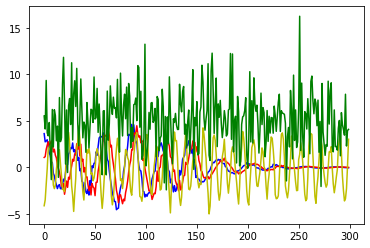

In [33]:


points = 300

sigma = 0.3 # mean and standard deviation
a = np.random.normal(1, sigma, points)
b = np.random.normal(3, sigma, points)

c_1 = np.ones(points//2)
c_2= np.array([1/np.sqrt(max(t,1)) for t in range(points//4)])
c_3= np.array([1/(t+4) for t in range(points//4)])

c = np.append(c_1, c_2)
c = np.append(c, c_3)

err = np.random.normal(0, sigma, points)

err2 = np.random.normal(0.5, sigma, points)



t = np.array(range(points))

frec1 = 5
frec2 =7


x = c*(a * np.sin(2*np.pi * (t/200) * frec1) + b * np.cos(2*np.pi * (t/200) * frec2) + err)

y = c*(a * np.sin(2*np.pi * ((t-5)/200) * frec1) + b * np.cos(2*np.pi * ((t-5)/200) * frec2) + err)

y2 = (a * np.sin(2*np.pi * ((t-5)/200) * 3 * frec1) + b * np.cos(2*np.pi * ((t-5)/200) * 3 * frec2) + err)

z = 10*err2

import matplotlib.pyplot as plt



plt.plot(t,x, color='b')
plt.plot(t,y, color='r')
plt.plot(t,y2, color='y')
plt.plot(t,z, color='g')

plt.show()

In [73]:
def generate_data_lasso_problem(x,y, L):
    data_x = []
    data_y = []
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        x_prev = x[t-L:t-1]
        y_prev = y[t-L:t-1]
        data_x.append(x_prev)
        data_y.append(y_prev)
        y_vals.append(y_t)
    return np.array(data_x),np.array(data_y), np.array(y_vals)

def generate_data_lasso_problem2(x,y, L):
    data_x = []
    data_y = []
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        x_prev = x[t-L:t-1]
        y_prev = y[t-L:t-1]
        data_x.append(x_prev)
        y_vals.append(y_t)
    return np.array(data_x), np.array(y_vals)



def apply_lagg(x,L):
    data_x = []
    for t in range(L,len(x)):
        x_prev = x[t-L:t-1]
        data_x.append(x_prev)
    data_x.reverse()
    return np.array(data_x)


def generate_data_lasso_problem_multiple(x_array, y, L):
    
    data_x_array = []
    data_y = apply_lagg(y,L)
    
    data_x_array.append(data_y) 
       
    for x in x_array:
        data_x_array.append(apply_lagg(x,L))
    
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        y_vals.append(y_t)
    y_vals.reverse()
        
    data = np.block(data_x_array)
        
    return data, np.array(data_y), np.array(y_vals)

In [75]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)


for i in range(2,4):
    data_x, data_y, y_vals = generate_data_lasso_problem(x,y, i)
    
    data = np.block([data_y, data_x])
    res = clf.fit(data_x,y_vals)

    print("lag ", i, clf.coef_)
    print("lag ", i, clf.score)



lag  2 [0.56922481]
lag  2 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  3 [ 0.93382231 -0.22942806]
lag  3 <bound method RegressorMixin.score of Lasso(alpha=0.1)>


In [76]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)


for i in range(2,4):
    data, data_y, y_vals = generate_data_lasso_problem_multiple([x,y2],y, i)
     
    res = clf.fit(data,y_vals)

    print("lag ", i, clf.coef_)
    print("lag ", i, clf.score)


lag  2 [ 0.80204873  0.19116144 -0.        ]
lag  2 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  3 [0.29343939 0.41265633 0.33047312 0.         0.         0.        ]
lag  3 <bound method RegressorMixin.score of Lasso(alpha=0.1)>


In [81]:
data, data_y, y_vals = generate_data_lasso_problem_multiple([x,y2],y, 4)

print(data)
print("----")
print(y_vals)


[[ 0.0376981   0.02781253  0.02135336 ... -3.60238242 -3.35052341
  -2.28875345]
 [ 0.04391832  0.0376981   0.02781253 ... -2.46801883 -3.60238242
  -3.35052341]
 [ 0.0448713   0.04391832  0.0376981  ... -0.91040549 -2.46801883
  -3.60238242]
 ...
 [ 1.94132169  2.40105691  2.76227072 ... -1.72366357 -0.12545711
   2.041227  ]
 [ 1.16485547  1.94132169  2.40105691 ... -3.49648161 -1.72366357
  -0.12545711]
 [ 1.07776891  1.16485547  1.94132169 ... -4.12213603 -3.49648161
  -1.72366357]]
----
[ 1.01642882e-02  2.13533636e-02  2.78125262e-02  3.76981033e-02
  4.39183155e-02  4.48713044e-02  5.12487962e-02  5.64185367e-02
  4.69648563e-02  4.48587745e-02  4.68796765e-02  3.58151439e-02
  2.95016742e-02  1.11818831e-02 -2.89216141e-03 -1.22222539e-02
 -1.89780365e-02 -3.57871136e-02 -4.44039843e-02 -5.99518273e-02
 -7.21810116e-02 -7.60978854e-02 -6.08788740e-02 -8.03631794e-02
 -6.22745727e-02 -5.33582740e-02 -4.32796123e-02 -3.02305072e-02
 -2.30422034e-02  2.27011495e-03  2.19918695e-02

In [8]:

# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

#data_x, data_y, y_vals = generate_data_lasso_problem(x,y, 5)
#data = np.block([data_y, data_x])
data_x , y_vals = generate_data_lasso_problem2(x,y, 5)
data = data_x

# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(data, y_vals)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

alpha = results.best_params_["alpha"]
clf = linear_model.Lasso(alpha=alpha)
res = clf.fit(data,y_vals)

print("lag ", clf.coef_)
print(clf.predict(data))

/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/li

MAE: -0.301
Config: {'alpha': 0.009000000000000001}
lag  [ 0.83342709  0.35216676 -0.         -0.32261506]
[ 2.60309861e+00  2.74563140e+00  3.17823699e+00  3.19953904e+00
  2.73444740e+00  2.19454469e+00  1.69540726e+00  1.21081996e+00
  7.55741373e-01 -6.64984052e-02 -6.24317080e-01 -1.40284389e+00
 -8.21643533e-01 -8.15010801e-01 -1.37549868e+00 -2.78442262e+00
 -2.72526742e+00 -2.21240943e+00 -1.39362681e+00 -1.62953592e+00
 -8.51430261e-01 -4.01624735e-01 -3.52147910e-01 -1.02889510e-01
  8.64032534e-01  1.30518866e+00  1.34317363e+00  1.58300446e+00
  1.88933707e+00  1.92825587e+00  2.80386742e+00  2.08774557e+00
  1.70292948e+00  5.53877806e-01  5.43640377e-01 -1.63106412e-01
  3.26911117e-01 -5.61288301e-01 -1.48219398e+00 -2.33651886e+00
 -3.14556017e+00 -2.90568458e+00 -2.54582884e+00 -2.11899047e+00
 -2.16397546e+00 -2.28374505e+00 -1.88915606e+00 -1.60068838e+00
 -9.85622258e-01 -2.98314829e-01  2.07020800e-01  1.01512501e+00
  1.46613626e+00  2.87220473e+00  2.50098586e+00

In [11]:
import pylops

#data_x, data_y, y_vals = generate_data_lasso_problem(x,y, 5)
#X = np.block([data_y, data_x])

data_x , y_vals = generate_data_lasso_problem2(x,y, 5)
X = data_x

print(X.shape, y_vals.shape)

Aop = pylops.MatrixMult(X)

eps = 0.009
maxit = 10000


xinv, niter, cost = pylops.optimization.sparsity.FISTA(
    Aop, y_vals, maxit, eps=eps, tol=1e-25, returninfo=True
)

xinv, niter, cost


(295, 4) (295,)


(array([ 0.82099413,  0.39612006, -0.00343243, -0.35222585]),
 10000,
 array([95.48343128, 86.63867929, 76.96228769, ..., 31.13375411,
        31.13375411, 31.13375411]))

In [35]:
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
import pylops

def calculate_fista_model(X, y, eps):
    k = np.sqrt(1/(2*len(y)))
    X = k*X
    y = k*y

    Aop = pylops.MatrixMult(X)
    maxit = 1000
    xinv, niter, cost = pylops.optimization.sparsity.FISTA(Aop, y, maxit, eps=eps, tol=1e-5, returninfo=True)
    return xinv, cost


def calculate_error(x, X, y):
    #err = np.linalg.norm(y.T - np.matmul(X,x.T)) + eps * np.linalg.norm(x, ord=1)
    #err = (1 / (2 * len(y))) * np.linalg.norm(y.T - np.matmul(X,x.T))**2 + eps * np.linalg.norm(x, ord=1)
    predicted_val = np.matmul(X,x.T)
    err = (1 / (2 * len(y))) * np.linalg.norm(y.T - np.matmul(X,x.T))**2 + eps * np.linalg.norm(x, ord=1)
    err = -np.linalg.norm(y.T - np.matmul(X,x.T))**2 /len(y)
    return err


#X, y_vals = generate_data_lasso_problem(x,y, 5)
#print(X.shape, y_vals.shape)
#xinv = calculate_fista_model(X, y_vals, 0.01)
#calculate_error(xinv, X,y_vals)

class FistaEstimator(BaseEstimator):
   def __init__(self, alpha=0.01):
      self.alpha = alpha
    
   def fit(self, X, y):
      self.coef_, cost = calculate_fista_model(X, y, self.alpha)
      self.score_ = cost[len(cost)-1]
      #print(cost)
      
   def score(self, X, y, sample_weight=None):
      y_pred = self.predict(X)
      return r2_score(y, y_pred, sample_weight=sample_weight)
      
   def predict(self, X):
      return np.matmul(X,self.coef_.T)


X, data_x, y_vals = generate_data_lasso_problem_multiple([x,y2],y, 5)
 
alph = 0.3
fista = FistaEstimator(alpha = alph)
fista.fit(X,y_vals)
result = fista.predict(X)
print(fista.coef_)



lasso = linear_model.Lasso(alpha=alph)
lasso.fit(X,y_vals)
print(lasso.coef_)


print(lasso.predict([X[25]]))
print(fista.predict([X[25]]))



[ 0.80614113  0.          0.         -0.          0.          0.
  0.          0.        ]
[ 0.80529656  0.          0.         -0.          0.          0.
  0.          0.        ]
[1.3513173]
[1.31878357]


In [91]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data, data_x, y_vals = generate_data_lasso_problem_multiple([x,y2,z],y, 5)
 
print(data.shape)

# define model
models = [linear_model.Lasso,FistaEstimator]
for model in models:
    print("model")
    # define model evaluation method
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['alpha'] = arange(0.5, 2, 0.01)
    # define search
    search = GridSearchCV(model(), grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=7, verbose=1)
    #search = GridSearchCV(model(), grid, scoring='max_error', cv=cv, n_jobs=7, verbose=1)
    # perform the search
    results = search.fit(data, y_vals)
    # summarize
    print('MAE: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)

    alpha = results.best_params_["alpha"]
    clf = model(alpha=alpha)
    res = clf.fit(data,y_vals)

    print("lag ", clf.coef_)

(285, 56)
model
Fitting 15 folds for each of 150 candidates, totalling 2250 fits
MAE: -0.294
Config: {'alpha': 0.5}
lag  [-0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.21068543  0.35405438
  0.20249967  0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.        ]
model
Fitting 15 folds for each of 150 candidates, totalling 2250 fits
MAE: -0.292
Config: {'alpha': 0.5}
lag  [-0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.   

In [25]:
import sklearn as sklearn
print(sklearn.metrics.get_scorer_names())
print("---")

print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [57]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

df = pd.DataFrame({'a': x, 'b':  y2}) 

grangercausalitytests(df[['a', 'b']], maxlag=[5,7])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.5941  , p=0.1617  , df_denom=284, df_num=5
ssr based chi2 test:   chi2=8.2792  , p=0.1415  , df=5
likelihood ratio test: chi2=8.1652  , p=0.1474  , df=5
parameter F test:         F=1.5941  , p=0.1617  , df_denom=284, df_num=5

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.5199  , p=0.1603  , df_denom=278, df_num=7
ssr based chi2 test:   chi2=11.2134 , p=0.1296  , df=7
likelihood ratio test: chi2=11.0041 , p=0.1384  , df=7
parameter F test:         F=1.5199  , p=0.1603  , df_denom=278, df_num=7


{5: ({'ssr_ftest': (1.5940979883323643, 0.16171821996349156, 284.0, 5),
   'ssr_chi2test': (8.279206101374076, 0.14150453860969373, 5),
   'lrtest': (8.165156661125934, 0.1473653407672712, 5),
   'params_ftest': (1.5940979883323254, 0.1617182199635, 284.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])]),
 7: ({'ssr_ftest': (1.5198982955824638, 0.16027200216852885, 278.0, 7),
   'ssr_chi2test': (11.213350374962712, 0.12957973599340117, 7),
   'lrtest': (11.00410040704162, 0.1384402630724492, 7),
   'params_ftest': (1.5198982955824554, 0.16027200216853085, 278.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 